In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install -q keras

In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [0]:
df=pd.read_csv('/content/drive/My Drive/train (1).csv',delimiter=',')

In [12]:
df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,181500
2,7,1786,2,608,920,920,2,6,2001,2002,223500
3,7,1717,3,642,756,961,1,7,1915,1970,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,250000


In [14]:
df.shape

(1460, 11)

In [0]:
#Statistics Summary
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [15]:
df.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64

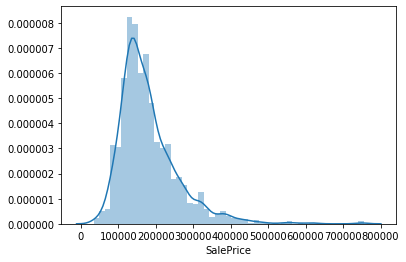

In [8]:
#Histogram
sns.distplot(df['SalePrice'])

In [32]:
#Linear Relationship Ratios
corr_matrix = df.corr()
print(corr_matrix['SalePrice'].sort_values(ascending=False))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


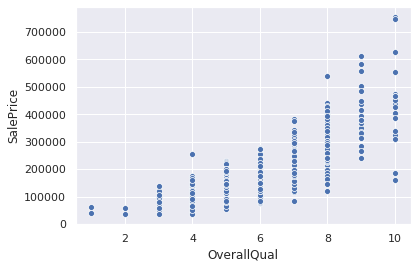

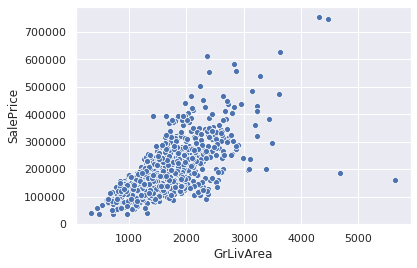

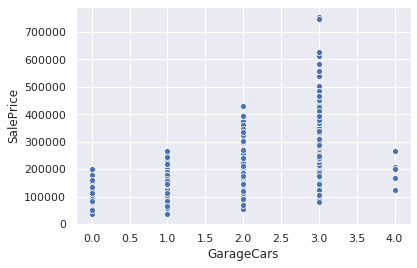

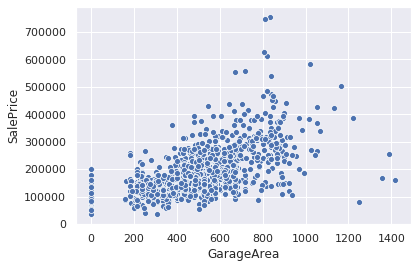

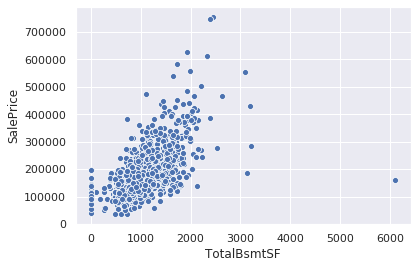

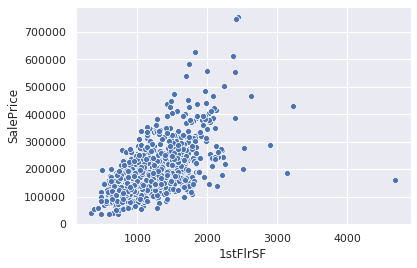

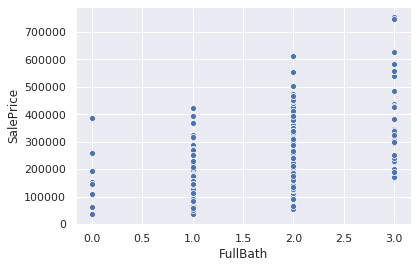

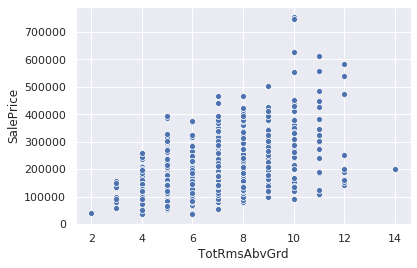

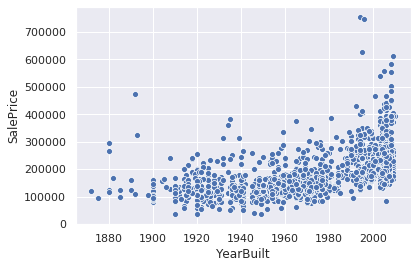

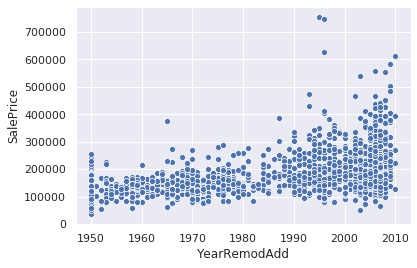

In [33]:
sns.set()
columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
for column in columns:
    plt.figure()
    sns.scatterplot(df[column], df['SalePrice'])

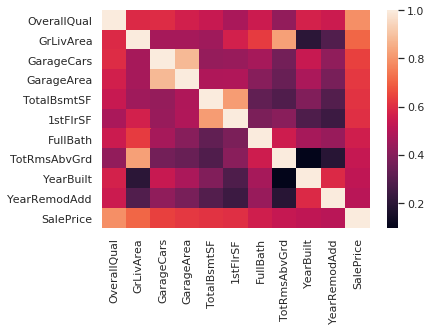

In [35]:
sns.heatmap(df.corr(),annot=False)

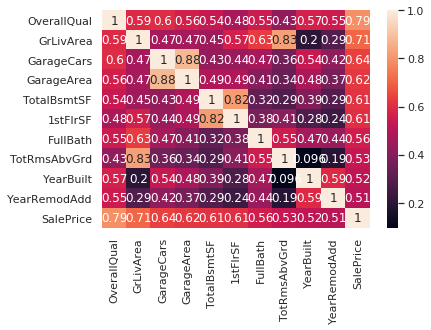

In [34]:
sns.heatmap(df.corr(),annot=True)

In [20]:
#Missing data

# Calculates the percentage of data missing for all features
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
SalePrice,0,0.0
YearRemodAdd,0,0.0
YearBuilt,0,0.0
TotRmsAbvGrd,0,0.0
FullBath,0,0.0
1stFlrSF,0,0.0
TotalBsmtSF,0,0.0
GarageArea,0,0.0
GarageCars,0,0.0
GrLivArea,0,0.0


In [0]:
# Reload dataset in case data was changed
df = pd.read_csv('/content/drive/My Drive/train (1).csv', delimiter=',')

# Excluding non-numerical data
#df = df.select_dtypes(exclude=['object'])

In [0]:
# Using the most relevant data and filling in the NaN's with the column mean values
columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'SalePrice']
df = df[columns]
df = df.fillna(df.mean())
dataset = df.values

In [0]:
# SalePrice goes into Y and the other values into X
X = dataset[:,:10]
Y = dataset[:,10]

In [25]:
#Create Model
model = Sequential([ #Create the single input layer
    Dense(32, activation = 'relu', input_shape = (10,)), # Creating only two hidden layers as the NN becomes harder to train as more hidden layers are added.
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid'), #Create the signle output layer since this is NN is regression
])

In [0]:
#Fit the Data
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
Y_scale = min_max_scaler.fit_transform(Y.reshape(-1, 1))

In [0]:
#Seperate the training from the test data
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y_scale, test_size=0.1)

In [28]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics =[metrics.mae])

In [29]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_test, Y_test))




Train on 1314 samples, validate on 146 samples
Epoch 1/100





1314/1314 [==============================] - 10s 7ms/step - loss: 0.1853 - mean_absolute_error: 0.4223 - val_loss: 0.1408 - val_mean_absolute_error: 0.3669
Epoch 2/100
1314/1314 [==============================] - 0s 99us/step - loss: 0.1183 - mean_absolute_error: 0.3338 - val_loss: 0.0954 - val_mean_absolute_error: 0.2975
Epoch 3/100
1314/1314 [==============================] - 0s 93us/step - loss: 0.0850 - mean_absolute_error: 0.2791 - val_loss: 0.0717 - val_mean_absolute_error: 0.2530
Epoch 4/100
1314/1314 [==============================] - 0s 94us/step - loss: 0.0665 - mean_absolute_error: 0.2432 - val_loss: 0.0576 - val_mean_absolute_error: 0.2236
Epoch 5/100
1314/1314 [==============================] - 0s 94us/step - loss: 0.0549 - mean_absolute_error: 0.2182 - val_loss: 0.0478 - val_mean_absolute_error: 0.2018
Epoch 6/100
1314/1314 [==============================] - 0s 89us/step - loss: 0.0466 - mean_absolute_erro

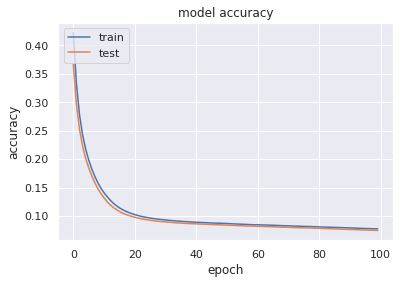

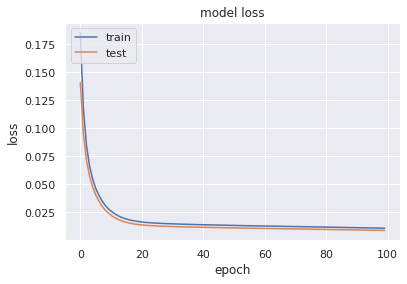

In [31]:
# summarize history for accuracy
plt.plot(hist.history['mean_absolute_error'])
plt.plot(hist.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()